# Pandas

The `numpy` module is excellent for numerical computations, but to handle missing data or arrays with mixed types takes more work. The `pandas` module is currently the most widely used tool for data manipulation, providing high-performance, easy-to-use data structures and advanced data analysis tools.

In particular `pandas` features:

* A fast and efficient "DataFrame" object for data manipulation with integrated indexing;
* Tools for reading and writing data between in-memory data structures and different formats (CSV, Excel, SQL, HDF5);
* Intelligent data alignment and integrated handling of missing data;
* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets;
* Aggregating or transforming data with a powerful "group-by" engine; 
* High performance merging and joining of data sets;
* Hierarchical axis indexing provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure;
* Time series-functionalities;
* Highly optimized for performance, with critical code paths written in Cython or C.


In [5]:
import pandas as pd
import numpy as np

## Series

Series are completely equivalent to 1D array but with axis labels and the possibility to store heterogeneous elements. Of paramount importance are the time-series, used to define time evolutions of a phenomenon. 


In [8]:
from string import ascii_lowercase as letters

# Creating a series, accessing indexes, values and values by their index 
xs = pd.Series(np.arange(10)*0.5, index=tuple(letters[:10]))
print (xs,'\n')
print (xs.index,'\n')
# Values of the Series are actually a numpy array
print (xs.values, type(xs.values),'\n')
print (xs['f'], xs.f, xs.h, '\n')
print (xs[['d', 'f', 'h']], '\n')

a    0.0
b    0.5
c    1.0
d    1.5
e    2.0
f    2.5
g    3.0
h    3.5
i    4.0
j    4.5
dtype: float64 

Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], dtype='object') 

[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5] <class 'numpy.ndarray'> 

2.5 2.5 3.5 

d    1.5
f    2.5
h    3.5
dtype: float64 



In [9]:
# Extracting elements and operations: same as numpy array
print (xs[:3],'\n')
print (xs[7:], '\n')
print (xs[::3], '\n')
print (xs[xs>3], '\n')
print (np.exp(xs), '\n')
print (np.mean(xs), np.std(xs), '\n')

a    0.0
b    0.5
c    1.0
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a    0.0
d    1.5
g    3.0
j    4.5
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a     1.000000
b     1.648721
c     2.718282
d     4.481689
e     7.389056
f    12.182494
g    20.085537
h    33.115452
i    54.598150
j    90.017131
dtype: float64 

2.25 1.4361406616345072 



In [10]:
# Series can be created from python dictionary too.
# Not that the elements can be whatever!
d = {'b' : 1, 'a' : 'cat', 'c' : [2,3]}
pd.Series(d)



b         1
a       cat
c    [2, 3]
dtype: object

A key difference between Series and ndarray is that operations between Series automatically align the data based on label. Thus, you can write computations without giving consideration to whether the Series involved have the same labels.

In [11]:
s = pd.Series(np.random.randn(5), index=tuple(letters[:5]))
s[1:] + s[:-1]

a         NaN
b   -1.270709
c    0.741132
d   -0.878764
e         NaN
dtype: float64

### Time series

Time series are very often used to profile the behaviour of a quantity as a function of time. Pandas as a special index for that, `DatetimeIndex`, that can be created e.g. with the function `pd.data_range()`

In [12]:
# to define a date, the datetime module is very useful
import datetime as dt
date = dt.date.today()
date = dt.datetime(2018,11,19,14,45,10,15)
print (date)

# otherwise, several notations are interpreted too
date = 'Nov 19 2018'
date = '19/11/2018 14:45:00'
print (date)

days = pd.date_range(date, periods=7, freq='D')
print (days)

seconds = pd.date_range(date, periods=3600, freq='s')
print (seconds)


2018-11-19 14:45:10.000015
19/11/2018 14:45:00
DatetimeIndex(['2018-11-19 14:45:00', '2018-11-20 14:45:00',
               '2018-11-21 14:45:00', '2018-11-22 14:45:00',
               '2018-11-23 14:45:00', '2018-11-24 14:45:00',
               '2018-11-25 14:45:00'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2018-11-19 14:45:00', '2018-11-19 14:45:01',
               '2018-11-19 14:45:02', '2018-11-19 14:45:03',
               '2018-11-19 14:45:04', '2018-11-19 14:45:05',
               '2018-11-19 14:45:06', '2018-11-19 14:45:07',
               '2018-11-19 14:45:08', '2018-11-19 14:45:09',
               ...
               '2018-11-19 15:44:50', '2018-11-19 15:44:51',
               '2018-11-19 15:44:52', '2018-11-19 15:44:53',
               '2018-11-19 15:44:54', '2018-11-19 15:44:55',
               '2018-11-19 15:44:56', '2018-11-19 15:44:57',
               '2018-11-19 15:44:58', '2018-11-19 15:44:59'],
              dtype='datetime64[ns]', length=3600, fr

To learn more about the frequency strings, please see this [link](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)


Timestamped data is the most basic type of time series data that associates values with points in time. For pandas objects it means using the points in time.

functions like `pd.to_datetime` can be used, for instance, when reading information as string from a dataset

In [13]:
tstamp = pd.Timestamp(dt.datetime(2018, 11, 19))

# internally it counts the nanoseconds from January 1st 19
#tstamp = pd.Timestamp(dt.datetime(1970, 1, 1, 0, 0, 0, 1))
print(tstamp.value)

# when creating a timestamp the format can be explicitly passed
print (pd.to_datetime('2010/11/12', format='%Y/%m/%d'))
print (pd.to_datetime('12-11-2010 00:00', format='%d-%m-%Y %H:%M'))


1542585600000000000
2010-11-12 00:00:00
2010-11-12 00:00:00


A standard series can be created and (range of) elements can be used as indexes

In [15]:
tseries = pd.Series(np.random.normal(10, 1, len(days)), index=days)
# Extracting elements
print (tseries[0:4], '\n')
print (tseries['2018-11-19':'2018-11-21'], '\n') # Note - includes end time


2018-11-19 14:45:00    10.373112
2018-11-20 14:45:00     8.847883
2018-11-21 14:45:00    10.435235
2018-11-22 14:45:00    11.310018
Freq: D, dtype: float64 

2018-11-19 14:45:00    10.373112
2018-11-20 14:45:00     8.847883
2018-11-21 14:45:00    10.435235
Freq: D, dtype: float64 



`pd.to_datetime` can also be used to create a `DatetimeIndex`:

In [16]:
pd.to_datetime([1, 2, 3], unit='D', origin=pd.Timestamp('1980-02-03'))

DatetimeIndex(['1980-02-04', '1980-02-05', '1980-02-06'], dtype='datetime64[ns]', freq=None)

## DataFrame

A pandas DataFrame is like a simple tabular spreadsheet. For future reference (or for people already familiar with R), a pandas DataFrame is very similar to the R DataFrame.

Each column in a DataFrame is a Series object.

The element can be whatever, missing data are dealt with too (as NaN)

### DataFrame creation

A DataFrame can be created implicitly, with, e.g., a DatatimeIndex object as index:

In [17]:
entries=10
dates=pd.date_range('19/11/2018 14:45:00',freq='h', periods=entries)
df = pd.DataFrame(np.random.randn(entries,4), index=dates, columns=['A','B','C','D'])
df


,A,B,C,D
2018-11-19 14:45:00,0.359681,1.086563,-2.716119,-0.904721
2018-11-19 15:45:00,-0.645785,0.975584,0.973039,0.864909
2018-11-19 16:45:00,0.164183,2.123244,-0.836184,-1.205243
2018-11-19 17:45:00,0.846086,-0.492129,0.056372,0.101583
2018-11-19 18:45:00,0.269695,1.574685,4.098314,0.975386
2018-11-19 19:45:00,1.240516,0.412408,-0.825298,-0.425909
2018-11-19 20:45:00,-0.209146,0.079918,0.119294,-0.359158
2018-11-19 21:45:00,-1.275729,0.476158,0.779981,-1.137841
2018-11-19 22:45:00,0.754867,-2.704250,0.519550,0.116832
2018-11-19 23:45:00,-1.260258,0.754403,-0.190748,0.665958


or by means of a dictionary:


In [18]:
df2 = pd.DataFrame(
    { 'A' : 1.,
      'B' : pd.Timestamp('20130102'),
      'C' : pd.Series(1,index=range(4),dtype='float32'),
      'D' : np.arange(7,11),
      'E' : pd.Categorical(["test","train","test","train"]),
    }
    )
   

In [19]:
df2

,A,B,C,D,E
0,1.0,2013-01-02,1.0,7,test
1,1.0,2013-01-02,1.0,8,train
2,1.0,2013-01-02,1.0,9,test
3,1.0,2013-01-02,1.0,10,train


### Viewing Data

In [20]:
df.head()

,A,B,C,D
2018-11-19 14:45:00,0.359681,1.086563,-2.716119,-0.904721
2018-11-19 15:45:00,-0.645785,0.975584,0.973039,0.864909
2018-11-19 16:45:00,0.164183,2.123244,-0.836184,-1.205243
2018-11-19 17:45:00,0.846086,-0.492129,0.056372,0.101583
2018-11-19 18:45:00,0.269695,1.574685,4.098314,0.975386


In [21]:
df.tail(4)

,A,B,C,D
2018-11-19 20:45:00,-0.209146,0.079918,0.119294,-0.359158
2018-11-19 21:45:00,-1.275729,0.476158,0.779981,-1.137841
2018-11-19 22:45:00,0.754867,-2.704250,0.519550,0.116832
2018-11-19 23:45:00,-1.260258,0.754403,-0.190748,0.665958


In [22]:
df.index

DatetimeIndex(['2018-11-19 14:45:00', '2018-11-19 15:45:00',
               '2018-11-19 16:45:00', '2018-11-19 17:45:00',
               '2018-11-19 18:45:00', '2018-11-19 19:45:00',
               '2018-11-19 20:45:00', '2018-11-19 21:45:00',
               '2018-11-19 22:45:00', '2018-11-19 23:45:00'],
              dtype='datetime64[ns]', freq='H')

In [23]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [24]:
df.values

array([[ 0.35968071,  1.08656319, -2.71611941, -0.90472052],
       [-0.64578463,  0.97558394,  0.97303893,  0.86490862],
       [ 0.16418299,  2.12324371, -0.83618408, -1.20524302],
       [ 0.84608596, -0.49212882,  0.05637214,  0.10158317],
       [ 0.26969458,  1.57468486,  4.09831405,  0.9753863 ],
       [ 1.24051639,  0.412408  , -0.82529811, -0.42590897],
       [-0.20914621,  0.07991826,  0.11929363, -0.35915796],
       [-1.2757294 ,  0.47615785,  0.77998087, -1.13784112],
       [ 0.75486709, -2.7042502 ,  0.51955018,  0.116832  ],
       [-1.26025828,  0.75440325, -0.19074845,  0.66595801]])

In [25]:
df.describe()

,A,B,C,D
count,10.000000,10.000000,10.000000,10.000000
mean,0.024411,0.428658,0.197820,-0.130820
std,0.864368,1.325400,1.733377,0.807739
min,-1.275729,-2.704250,-2.716119,-1.205243
25%,-0.536625,0.163041,-0.666661,-0.785018
50%,0.216939,0.615281,0.087833,-0.128787
75%,0.656070,1.058818,0.714873,0.528677
max,1.240516,2.123244,4.098314,0.975386


In [26]:
df.T

,2018-11-19 14:45:00,2018-11-19 15:45:00,2018-11-19 16:45:00,2018-11-19 17:45:00,2018-11-19 18:45:00,2018-11-19 19:45:00,2018-11-19 20:45:00,2018-11-19 21:45:00,2018-11-19 22:45:00,2018-11-19 23:45:00
A,0.359681,-0.645785,0.164183,0.846086,0.269695,1.240516,-0.209146,-1.275729,0.754867,-1.260258
B,1.086563,0.975584,2.123244,-0.492129,1.574685,0.412408,0.079918,0.476158,-2.704250,0.754403
C,-2.716119,0.973039,-0.836184,0.056372,4.098314,-0.825298,0.119294,0.779981,0.519550,-0.190748
D,-0.904721,0.864909,-1.205243,0.101583,0.975386,-0.425909,-0.359158,-1.137841,0.116832,0.665958


In [27]:
df.sort_index(axis=1,ascending=False)

,D,C,B,A
2018-11-19 14:45:00,-0.904721,-2.716119,1.086563,0.359681
2018-11-19 15:45:00,0.864909,0.973039,0.975584,-0.645785
2018-11-19 16:45:00,-1.205243,-0.836184,2.123244,0.164183
2018-11-19 17:45:00,0.101583,0.056372,-0.492129,0.846086
2018-11-19 18:45:00,0.975386,4.098314,1.574685,0.269695
2018-11-19 19:45:00,-0.425909,-0.825298,0.412408,1.240516
2018-11-19 20:45:00,-0.359158,0.119294,0.079918,-0.209146
2018-11-19 21:45:00,-1.137841,0.779981,0.476158,-1.275729
2018-11-19 22:45:00,0.116832,0.519550,-2.704250,0.754867
2018-11-19 23:45:00,0.665958,-0.190748,0.754403,-1.260258


In [28]:
df.sort_values(by="C")

,A,B,C,D
2018-11-19 14:45:00,0.359681,1.086563,-2.716119,-0.904721
2018-11-19 16:45:00,0.164183,2.123244,-0.836184,-1.205243
2018-11-19 19:45:00,1.240516,0.412408,-0.825298,-0.425909
2018-11-19 23:45:00,-1.260258,0.754403,-0.190748,0.665958
2018-11-19 17:45:00,0.846086,-0.492129,0.056372,0.101583
2018-11-19 20:45:00,-0.209146,0.079918,0.119294,-0.359158
2018-11-19 22:45:00,0.754867,-2.704250,0.519550,0.116832
2018-11-19 21:45:00,-1.275729,0.476158,0.779981,-1.137841
2018-11-19 15:45:00,-0.645785,0.975584,0.973039,0.864909
2018-11-19 18:45:00,0.269695,1.574685,4.098314,0.975386


## Selection

### Getting slices

The following show how to get part of the DataFrame (i.e. not just the elements)

In [29]:
## standard and safe
print (df['A'],'\n')

## equivalent but dangerous (imagine blank spaces in the name of the column..)
print (df.A)

2018-11-19 14:45:00    0.359681
2018-11-19 15:45:00   -0.645785
2018-11-19 16:45:00    0.164183
2018-11-19 17:45:00    0.846086
2018-11-19 18:45:00    0.269695
2018-11-19 19:45:00    1.240516
2018-11-19 20:45:00   -0.209146
2018-11-19 21:45:00   -1.275729
2018-11-19 22:45:00    0.754867
2018-11-19 23:45:00   -1.260258
Freq: H, Name: A, dtype: float64 

2018-11-19 14:45:00    0.359681
2018-11-19 15:45:00   -0.645785
2018-11-19 16:45:00    0.164183
2018-11-19 17:45:00    0.846086
2018-11-19 18:45:00    0.269695
2018-11-19 19:45:00    1.240516
2018-11-19 20:45:00   -0.209146
2018-11-19 21:45:00   -1.275729
2018-11-19 22:45:00    0.754867
2018-11-19 23:45:00   -1.260258
Freq: H, Name: A, dtype: float64


In [30]:
# selecting rows by counting
print (df[0:3])

# or by index
print (df["2018-11-19 14:45:00":"2018-11-19 16:45:00"])

                            A         B         C         D
2018-11-19 14:45:00  0.359681  1.086563 -2.716119 -0.904721
2018-11-19 15:45:00 -0.645785  0.975584  0.973039  0.864909
2018-11-19 16:45:00  0.164183  2.123244 -0.836184 -1.205243
                            A         B         C         D
2018-11-19 14:45:00  0.359681  1.086563 -2.716119 -0.904721
2018-11-19 15:45:00 -0.645785  0.975584  0.973039  0.864909
2018-11-19 16:45:00  0.164183  2.123244 -0.836184 -1.205243


### Selection by label

In [33]:
# getting a cross section (part of the DataFrame) using a label
df.loc[dates[0]]

A    0.359681
B    1.086563
C   -2.716119
D   -0.904721
Name: 2018-11-19 14:45:00, dtype: float64

In [34]:
# selecting on a multi-axis by label:
df.loc[:,['A','B']]

,A,B
2018-11-19 14:45:00,0.359681,1.086563
2018-11-19 15:45:00,-0.645785,0.975584
2018-11-19 16:45:00,0.164183,2.123244
2018-11-19 17:45:00,0.846086,-0.492129
2018-11-19 18:45:00,0.269695,1.574685
2018-11-19 19:45:00,1.240516,0.412408
2018-11-19 20:45:00,-0.209146,0.079918
2018-11-19 21:45:00,-1.275729,0.476158
2018-11-19 22:45:00,0.754867,-2.704250
2018-11-19 23:45:00,-1.260258,0.754403


In [35]:
# showing label slicing, both endpoints are included:
df.loc['2018-11-19 18:45:00':'2018-11-19 20:45:00',['A','B']]

,A,B
2018-11-19 18:45:00,0.269695,1.574685
2018-11-19 19:45:00,1.240516,0.412408
2018-11-19 20:45:00,-0.209146,0.079918


In [36]:
# getting an individual element
print (df.loc[dates[1],'A'])

# equivalently
print (df.at[dates[1],'A'])

-0.6457846255609369
-0.6457846255609369


### Selecting by position

In [37]:
# select via the position of the passed integers:
print (df.iloc[3],'\n')

# notation similar to numpy/python
print (df.iloc[3:5,0:2])

A    0.846086
B   -0.492129
C    0.056372
D    0.101583
Name: 2018-11-19 17:45:00, dtype: float64 

                            A         B
2018-11-19 17:45:00  0.846086 -0.492129
2018-11-19 18:45:00  0.269695  1.574685


In [38]:
# selecting raws 1,2 and 4 for columns 0 and 2
df.iloc[[1,2,4],[0,2]]

,A,C
2018-11-19 15:45:00,-0.645785,0.973039
2018-11-19 16:45:00,0.164183,-0.836184
2018-11-19 18:45:00,0.269695,4.098314


In [39]:
# slicing rows explicitly
print (df.iloc[1:3,:],'\n')

# slicing columns explicitly
print (df.iloc[:,1:3])


                            A         B         C         D
2018-11-19 15:45:00 -0.645785  0.975584  0.973039  0.864909
2018-11-19 16:45:00  0.164183  2.123244 -0.836184 -1.205243 

                            B         C
2018-11-19 14:45:00  1.086563 -2.716119
2018-11-19 15:45:00  0.975584  0.973039
2018-11-19 16:45:00  2.123244 -0.836184
2018-11-19 17:45:00 -0.492129  0.056372
2018-11-19 18:45:00  1.574685  4.098314
2018-11-19 19:45:00  0.412408 -0.825298
2018-11-19 20:45:00  0.079918  0.119294
2018-11-19 21:45:00  0.476158  0.779981
2018-11-19 22:45:00 -2.704250  0.519550
2018-11-19 23:45:00  0.754403 -0.190748


In [40]:
# selecting an individual element by position
df.iloc[1,1]
df.iat[1,1]


0.975583937450505

### Boolean index

Very powerful way of filtering out data with certain features. Notation is very similar to numpy arrays.

In [ ]:
# Filter by a boolean condition on the values of a single column
df[df['B'] > 0]

In [ ]:
# Selecting on the basis of boolean conditions applied to the whole DataFrame
df[df>0]

# a DataFrame with the same shape is returned, with NaN's where condition is not met

### Setting

Combination of selection and setting of values

In [ ]:
# setting values by label (same as by position)
df.at[dates[0],'A'] = 0

# setting and assigning a numpy array
df.loc[:,'D'] = np.array([5] * len(df))

# defining a brend new column
df['E'] = np.arange(len(df))*0.5

# defining a brend new column by means of a pd.Series: indexes must be the same!
df['E prime'] = pd.Series(np.arange(len(df))*2, index=df.index)


In [ ]:
def dcos(theta):
    theta = theta*(np.pi/180)
    return np.cos(theta)
 
df['cosine'] = pd.Series(df["E"].apply(dcos), index=df.index)
df

In [ ]:
# another example of global setting
df2=df.copy()
df2[df2>0] = -df2
df2

### Dropping

N.B.: dropping doesn't act permanently on the DataFrame, i.e. to get that do :
```python
df = df.drop(....)
```

In [ ]:
# Dropping by column
df.drop(['E prime'], axis=1)

#which is equivalent to
df.drop(columns=['E prime'])

In [ ]:
# Dropping by raws
# save and always working
df.drop(df.index[[1,2,3,4]])

In [ ]:
# something like df.drop('index_name') 
# would work but the type of index must be specificed, 
# in particular with DatetimeIndex
df.drop(pd.to_datetime("2018-11-19 22:45:00"))

## Missing data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations.

In [ ]:
df_wNan = df[df>0]
df_wNan

In [ ]:
# dropping raws with at least a Nan
df_wNan.dropna(how='any')

In [ ]:
# getting a mask
df_wNan.isna()
#df_wNan.notna()

In [ ]:
# filling missing data
df_wNan.fillna(value=0)

Fill gaps forward or backward by propagating non-NA values forward or backward:

In [ ]:
df_wNan.fillna(method='pad')

## Operations

Here comes the most relevant advantage of DataFrame. Operations on columns are extremly fast, almost as fast as the actual operation between elements in a raw

In [ ]:
# Some statistics (mean() just as an example)
# raws
print (df.mean(axis=0),'\n')
# columns
print (df.mean(axis=1),'\n')

In [ ]:
# global operations on columns
df.apply(np.cumsum)

In [ ]:
df.apply(lambda x: x.max() - x.min())

In [ ]:
# syntax is as usual similar to that of numpy arrays
df['A']+df['B']

Let's play it hard and load (in memory) a (relatively) large dataset

In [ ]:
file_name="/Users/mzanetti/data/LEMMA2018/DT/raw/data_000636.txt"
data=pd.read_csv(file_name)
data

Let's know do some operations among (elements of) columns

In [ ]:
# the one-liner killing it all
data['timens']=data['TDC_MEAS']*25/30+data['BX_COUNTER']*25

In [ ]:
# the old slooow way
def conversion(data):
    result=[]
    for i in range(len(data)): 
        result.append(data.loc[data.index[i],'TDC_MEAS']*25/30.+data.loc[data.index[i],'BX_COUNTER']*25)
    return result

data['timens']=conversion(data)

## Merge

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

### Concat

concatenation (adding raws) is straightforward


In [ ]:
rdf = pd.DataFrame(np.random.randn(10, 4))
rdf

In [ ]:
# divide it into pieaces raw-wise
pieces = [rdf[:3], rdf[3:7], rdf[7:]]
pieces

In [ ]:
# put it back together
pd.concat(pieces)

# indexes can be ignored
#pd.concat(pieces, ignore_index=True)

# in case of dimension mismatch, Nan are added where needed

In [ ]:
# appending a single raw (as a Series)
s = rdf.iloc[3]
rdf.append(s, ignore_index=True)


### Merge/Join

SQL like operations on table can be performed on DataFrames. This is all rather sophisticated, refer to the [doc](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging) for more info/examples

In [ ]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})

pd.merge(left,right,on="key")

## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure


In [46]:
gdf = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                    'C' : np.random.randn(8),
                    'D' : np.random.randn(8)})
gdf

,A,B,C,D
0,foo,one,0.379944,0.782104
1,bar,one,0.575469,-1.396831
2,foo,two,-0.123626,0.342119
3,bar,three,-2.900196,-0.227592
4,foo,two,0.646231,1.074834
5,bar,two,1.043767,-0.220280
6,foo,one,0.168457,1.435213
7,foo,three,-1.817099,-0.521069


In [47]:
# Grouping and then applying the sum() 
# function to the resulting groups (effective only where number are there).
gdf.groupby('A').sum()

,C,D
A,,
bar,-1.280959,-1.844703
foo,-0.746092,3.113201


## Multi-indexing


Hierarchical / Multi-level indexing allows sophisticated data analysis on higher dimensional data. In essence, it enables you to store and manipulate data with an arbitrary number of dimensions in lower dimensional data structures like Series (1d) and DataFrame (2d).

In [ ]:
tuples = list(zip(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
          ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']))
multi_index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
print (index,'\n')

s = pd.Series(np.random.randn(8), index=multi_index)
print (s)


In [ ]:
# it enables further features of the groupby method,
# e.g. when group-by by multiple columns
gdf.groupby(['A','B']).sum()

In [ ]:
# stack() method “compresses” a level in the DataFrame’s columns
gdf.groupby(['A','B']).sum().stack()

## Plotting

Just a preview, more on the next lab class!

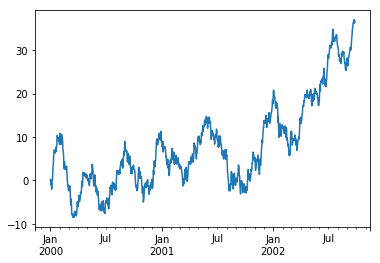

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts.cumsum().plot()

<Figure size 432x288 with 0 Axes>

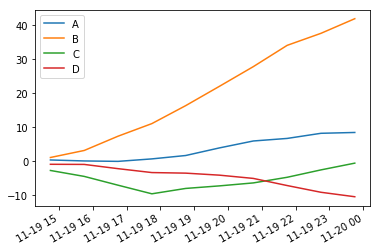

In [45]:
pdf=pd.DataFrame(np.random.randn(1000, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')